# Introduction to Data Science - miniproject

This is a miniproject for the course Introduction to Data Science in University of Helsinki 2023.

## Data

Data was downloaded from Greater Helsinki Open Statistical Databases webpage. It shares different information about Helsinki region.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pette\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def remove_quotes(column):
    return column.apply(lambda x: str(x).replace('"', ''))

def change_to_numeric(column):
    return pd.to_numeric(column, downcast='float', errors='coerce')

### Persons aged 15 or over in Helsinki by gender, age and level of education

Load and clean the data.

In [3]:
age_gender_education = pd.read_csv('../data/Helsingin_15_vuotta_tayttaneet_sukupuolen_ian_ja_koulutusasteen_mukaan.csv',
                                   sep='\,', engine='python')

columns = age_gender_education.columns
age_gender_education = age_gender_education.rename(columns={columns[0]:'Area',
                                                            columns[1]:'Gender',
                                                            columns[2]:'Level of education',
                                                            columns[3]:'Aged 15 and over',
                                                            columns[4]:'15-24',
                                                            columns[5]:'25-44',
                                                            columns[6]:'45-64',
                                                            columns[7]:'65 and over',
                                                           })

columns = age_gender_education.columns
age_gender_education['Area'] = remove_quotes(age_gender_education['Area'])
age_gender_education['Gender'] = remove_quotes(age_gender_education['Gender'])
age_gender_education['Level of education'] = remove_quotes(age_gender_education['Level of education'])
for col in columns[3:]:
    age_gender_education[col] = remove_quotes(age_gender_education[col])
    age_gender_education[col] = change_to_numeric(age_gender_education[col])
    
categorical_values = ['Area', 'Gender', 'Level of education']
for val in categorical_values:
    age_gender_education[val] = age_gender_education[val].astype('category')    
    
age_gender_education.head(10)

,Area,Gender,Level of education,Aged 15 and over,15-24,25-44,45-64,65 and over
0,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Kaikki koulutusasteet,11310.0,1393.0,4085.0,3192.0,2640.0
1,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Tutkinnon suorittaneita yhteensa,9651.0,846.0,3619.0,2938.0,2248.0
2,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,3-4 Toinen aste ja erikoisammattikoulutusaste,2888.0,720.0,990.0,698.0,480.0
3,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,5-6 Alin korkea- ja alempi korkeakouluaste,2644.0,121.0,1024.0,737.0,762.0
4,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,7-8 Ylempi korkeakouluaste ja tutkijakoulutus,4119.0,5.0,1605.0,1503.0,1006.0
5,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Perusaste tai tuntematon,1659.0,547.0,466.0,254.0,392.0
6,091 101 Vironniemen peruspiiri,Miehet,Kaikki koulutusasteet,5234.0,602.0,1984.0,1558.0,1090.0
7,091 101 Vironniemen peruspiiri,Miehet,Tutkinnon suorittaneita yhteensa,4405.0,342.0,1712.0,1400.0,951.0
8,091 101 Vironniemen peruspiiri,Miehet,3-4 Toinen aste ja erikoisammattikoulutusaste,1439.0,297.0,562.0,399.0,181.0
9,091 101 Vironniemen peruspiiri,Miehet,5-6 Alin korkea- ja alempi korkeakouluaste,1014.0,43.0,427.0,299.0,245.0


In [4]:
age_gender_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area                3384 non-null   category
 1   Gender              3384 non-null   category
 2   Level of education  3384 non-null   category
 3   Aged 15 and over    2952 non-null   float32 
 4   15-24               2952 non-null   float32 
 5   25-44               2952 non-null   float32 
 6   45-64               2952 non-null   float32 
 7   65 and over         2952 non-null   float32 
dtypes: category(3), float32(5)
memory usage: 85.3 KB


Normalize the data.

In [5]:
population_by_education = age_gender_education[age_gender_education['Level of education'] == 'Kaikki koulutusasteet']
population_by_education = population_by_education.rename(columns={'Aged 15 and over': 'total population'})
population_by_education = population_by_education[['Area', 'Gender', 'total population']]
age_gender_education = pd.merge(age_gender_education, population_by_education, on=['Area', 'Gender'])
age_gender_education['Education % 15-24 years'] = age_gender_education['Aged 15 and over'] / age_gender_education['total population']
age_gender_education['Education % 25-44 years'] = age_gender_education['25-44'] / age_gender_education['total population']
age_gender_education['Education % 45-64 years'] = age_gender_education['45-64'] / age_gender_education['total population']
age_gender_education['Education % 65 and over'] = age_gender_education['65 and over'] / age_gender_education['total population']
age_gender_education = age_gender_education[['Area',
                                             'Gender',
                                             'Level of education',
                                             'Education % 15-24 years',
                                             'Education % 25-44 years',
                                             'Education % 45-64 years',
                                             'Education % 65 and over'
                                            ]]

age_gender_education.head(10)

,Area,Gender,Level of education,Education % 15-24 years,Education % 25-44 years,Education % 45-64 years,Education % 65 and over
0,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Kaikki koulutusasteet,1.000000,0.361185,0.282228,0.233422
1,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Tutkinnon suorittaneita yhteensa,0.853316,0.319982,0.259770,0.198762
2,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,3-4 Toinen aste ja erikoisammattikoulutusaste,0.255349,0.087533,0.061715,0.042440
3,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,5-6 Alin korkea- ja alempi korkeakouluaste,0.233775,0.090539,0.065164,0.067374
4,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,7-8 Ylempi korkeakouluaste ja tutkijakoulutus,0.364191,0.141910,0.132891,0.088948
5,091 101 Vironniemen peruspiiri,Molemmat sukupuolet,Perusaste tai tuntematon,0.146684,0.041202,0.022458,0.034660
6,091 101 Vironniemen peruspiiri,Miehet,Kaikki koulutusasteet,1.000000,0.379060,0.297669,0.208254
7,091 101 Vironniemen peruspiiri,Miehet,Tutkinnon suorittaneita yhteensa,0.841613,0.327092,0.267482,0.181697
8,091 101 Vironniemen peruspiiri,Miehet,3-4 Toinen aste ja erikoisammattikoulutusaste,0.274933,0.107375,0.076232,0.034582
9,091 101 Vironniemen peruspiiri,Miehet,5-6 Alin korkea- ja alempi korkeakouluaste,0.193733,0.081582,0.057126,0.046809


Translate the data.

In [6]:
age_gender_education['Gender'] = age_gender_education['Gender'].apply(lambda x:
                                                                      str(x).replace('Molemmat sukupuolet', 'Both genders'))
age_gender_education['Gender'] = age_gender_education['Gender'].apply(lambda x: str(x).replace('Miehet', 'Men'))
age_gender_education['Gender'] = age_gender_education['Gender'].apply(lambda x: str(x).replace('Naiset', 'Women'))
age_gender_education['Level of education'] = \
    age_gender_education['Level of education'].apply(lambda x:
                                                     str(x).replace('3-4 Toinen aste ja erikoisammattikoulutusaste',
                                                                    'Second degree and special vocational training degree'))
age_gender_education['Level of education'] = \
    age_gender_education['Level of education'].apply(lambda x:
                                                     str(x).replace('5-6 Alin korkea- ja alempi korkeakouluaste',
                                                                    'Lowest higher and lower university level'))
age_gender_education['Level of education'] = \
    age_gender_education['Level of education'].apply(lambda x:
                                                     str(x).replace('7-8 Ylempi korkeakouluaste ja tutkijakoulutus',
                                                                    'Higher university degree and research training'))

In [7]:
plot_data = age_gender_education[
    (age_gender_education['Level of education'] == 'Second degree and special vocational training degree') | \
    (age_gender_education['Level of education'] == 'Lowest higher and lower university level') | \
    (age_gender_education['Level of education'] == 'Higher university degree and research training')]
plot_data.loc[:,'Level of education'] = plot_data['Level of education'].cat.remove_unused_categories()

C:\Users\pette\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


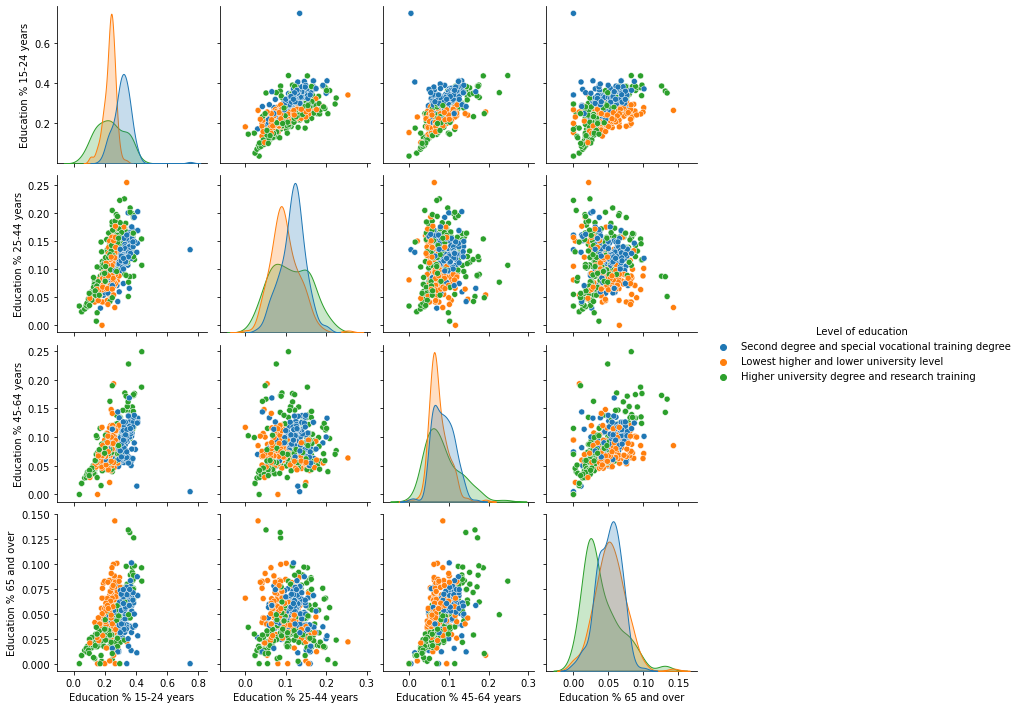

<Figure size 432x288 with 0 Axes>

In [8]:
sns.pairplot(data=plot_data[plot_data.Gender == 'Both genders'], 
             vars=['Education % 15-24 years',
                   'Education % 25-44 years',
                   'Education % 45-64 years',
                   'Education % 65 and over'], hue='Level of education')
plt.show()
plt.clf()

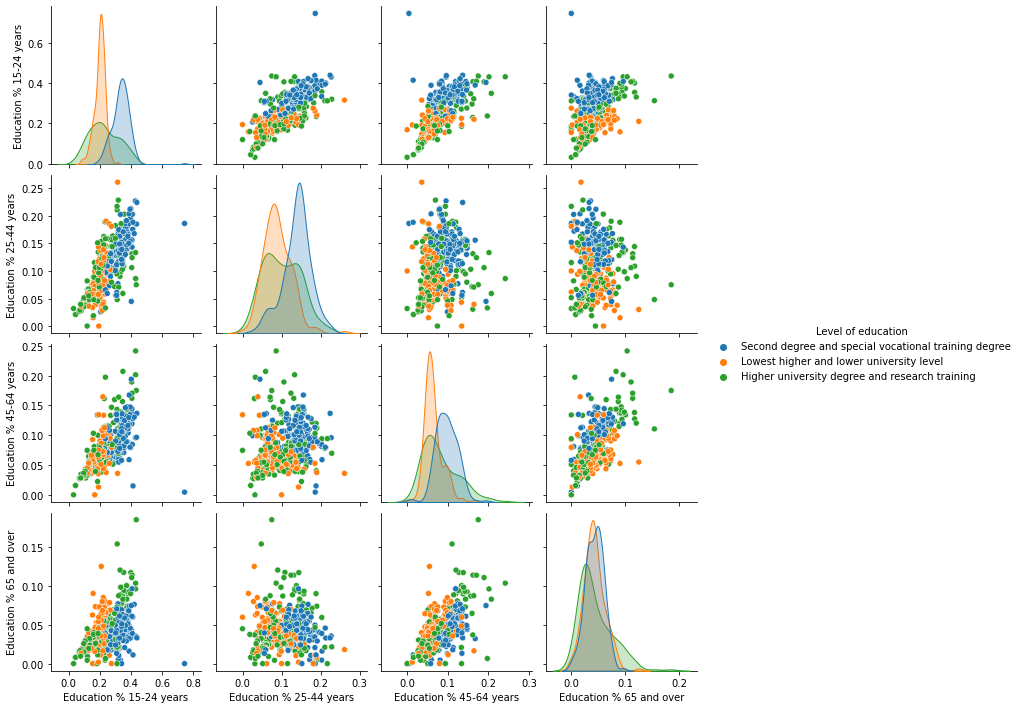

<Figure size 432x288 with 0 Axes>

In [9]:
sns.pairplot(data=plot_data[plot_data.Gender == 'Men'], 
             vars=['Education % 15-24 years',
                   'Education % 25-44 years',
                   'Education % 45-64 years',
                   'Education % 65 and over'], hue='Level of education')
plt.show()
plt.clf()

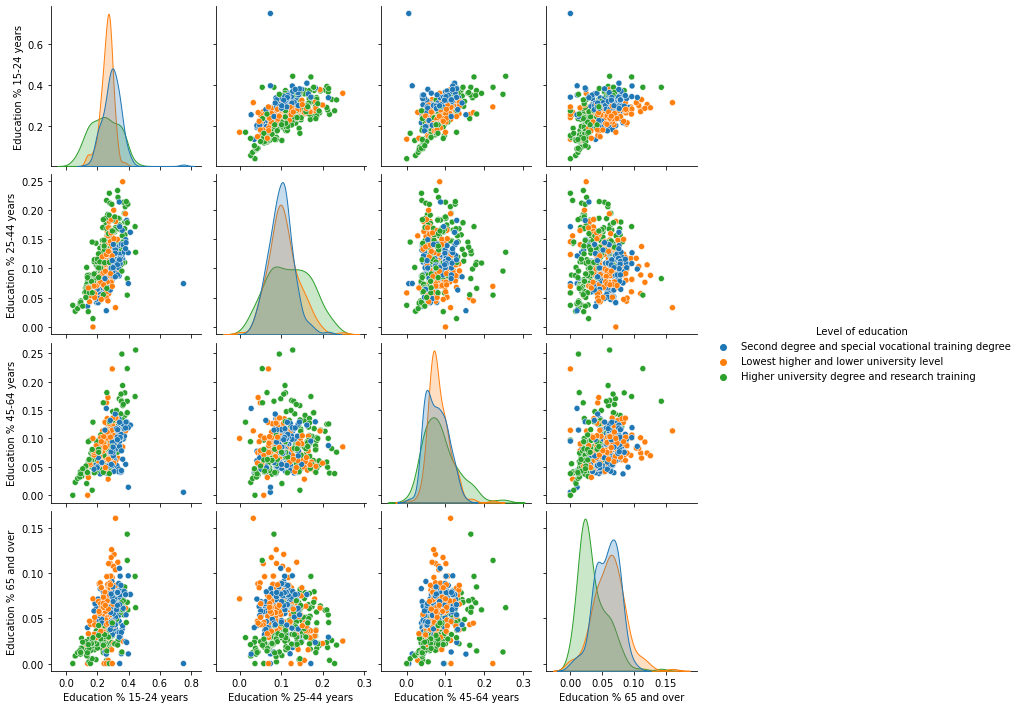

<Figure size 432x288 with 0 Axes>

In [10]:
sns.pairplot(data=plot_data[plot_data.Gender == 'Women'], 
             vars=['Education % 15-24 years',
                   'Education % 25-44 years',
                   'Education % 45-64 years',
                   'Education % 65 and over'], hue='Level of education')
plt.show()
plt.clf()

## Income and taxation of household-dwelling units in Helsinki

In [11]:
income_and_taxes = pd.read_csv('../data/Helsingin_asuntokuntien_tulot_ja_verotus.csv', sep='\,', engine='python')
columns = income_and_taxes.columns
income_and_taxes = income_and_taxes.rename(columns={columns[0]:'Area',
                                                        columns[1]:'Type of income',
                                                        columns[2]:'2017',
                                                        })
income_and_taxes['Area'] = remove_quotes(income_and_taxes['Area'])
income_and_taxes['Type of income'] = remove_quotes(income_and_taxes['Type of income'])
income_and_taxes['2017'] = remove_quotes(income_and_taxes['2017'])
income_and_taxes['2017'] = change_to_numeric(income_and_taxes['2017'])

categorical_values = ['Area', 'Type of income']
for val in categorical_values:
    income_and_taxes[val] = income_and_taxes[val].astype('category')   
    
income_and_taxes.head()

,Area,Type of income,2017
0,091 101 Vironniemen peruspiiri,Asuntokunnat,6703.0
1,091 101 Vironniemen peruspiiri,Henkilot,12608.0
2,091 101 Vironniemen peruspiiri,Valtionveronalaiset tulot yhteensa 100 e,5996413.0
3,091 101 Vironniemen peruspiiri,Valtionveronalaiset tulot e / asuntokunta,89459.0
4,091 101 Vironniemen peruspiiri,Valtionveronalaiset tulot e / henkilo,47560.0


In [12]:
income_and_taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Area            2068 non-null   category
 1   Type of income  2068 non-null   category
 2   2017            1738 non-null   float32 
dtypes: category(2), float32(1)
memory usage: 20.2 KB


Translate the data.

In [13]:
income_and_taxes['Type of income'] = \
    income_and_taxes['Type of income'].apply(lambda x:
                                             str(x).replace('Asuntokunnat', 'Housing units'))
income_and_taxes['Type of income'] = \
    income_and_taxes['Type of income'].apply(lambda x:
                                             str(x).replace('Henkilot', 'Persons'))
income_and_taxes['Type of income'] = \
    income_and_taxes['Type of income'].apply(lambda x:
                                             str(x).replace('Valtionveronalaiset tulot e / asuntokunta',
                                                            'State taxable income e / housing association'))
income_and_taxes['Type of income'] = \
    income_and_taxes['Type of income'].apply(lambda x:
                                             str(x).replace('Valtionveronalaiset tulot e / henkilo',
                                                            'State taxable income e / person'))

In [14]:
income_and_taxes = income_and_taxes[(income_and_taxes['Type of income'] == 'State taxable income e / housing association') | \
                                    (income_and_taxes['Type of income'] == 'State taxable income e / person')
                                   ]

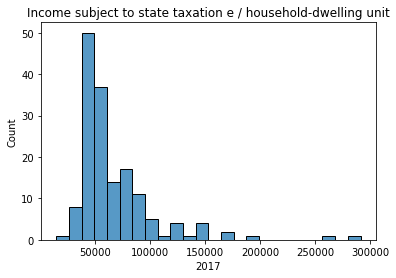

<Figure size 432x288 with 0 Axes>

In [15]:
sns.histplot(data=income_and_taxes[(income_and_taxes['Type of income'] == 'State taxable income e / housing association')],
             x='2017')
plt.title('Income subject to state taxation e / household-dwelling unit')
plt.show()
plt.clf()

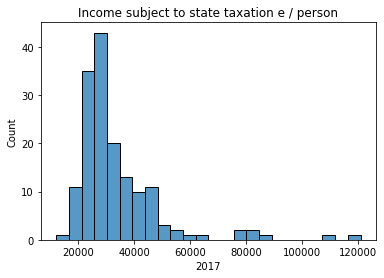

<Figure size 432x288 with 0 Axes>

In [16]:
sns.histplot(data=income_and_taxes[(income_and_taxes['Type of income'] == 'State taxable income e / person')],
             x='2017')
plt.title('Income subject to state taxation e / person')
plt.show()
plt.clf()

## Families in Helsinki by family type

In [17]:
type_of_family = pd.read_csv('../data/Helsingin_perheet_perhetyypin_mukaan.csv', sep='\,', engine='python')
columns = type_of_family.columns
type_of_family = type_of_family.rename(columns={columns[0]:'Area', columns[1]:'Type of family', columns[2]:'2022'})
type_of_family['2022'] = remove_quotes(type_of_family['2022'])
type_of_family['2022'] = change_to_numeric(type_of_family['2022'])
type_of_family['Area'] = remove_quotes(type_of_family['Area'])
type_of_family['Type of family'] = remove_quotes(type_of_family['Type of family'])

categorical_values = ['Area', 'Type of family']
for val in categorical_values:
    type_of_family[val] = type_of_family[val].astype('category')   
    
type_of_family.head()

,Area,Type of family,2022
0,091 101 Vironniemen peruspiiri,Perheet yhteensa,3509.0
1,091 101 Vironniemen peruspiiri,Aviopari ilman lapsia,1243.0
2,091 101 Vironniemen peruspiiri,Avopari ilman lapsia,854.0
3,091 101 Vironniemen peruspiiri,Aviopari ja lapsia,798.0
4,091 101 Vironniemen peruspiiri,Avopari ja lapsia,207.0


In [18]:
# type_of_family['2022'].astype(str).astype(int)
type_of_family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Area            1316 non-null   category
 1   Type of family  1316 non-null   category
 2   2022            1106 non-null   float32 
dtypes: category(2), float32(1)
memory usage: 15.0 KB


Normalize the data.

In [19]:
total_families = type_of_family[type_of_family['Type of family'] == 'Perheet yhteensa']
total_families = total_families.rename(columns={'2022': 'total families'})
type_of_family = pd.merge(type_of_family, total_families, on=['Area', 'Type of family'], how='left')
type_of_family['total families'] = type_of_family['total families'].fillna(method='ffill')
type_of_family.head(10)

,Area,Type of family,2022,total families
0,091 101 Vironniemen peruspiiri,Perheet yhteensa,3509.0,3509.0
1,091 101 Vironniemen peruspiiri,Aviopari ilman lapsia,1243.0,3509.0
2,091 101 Vironniemen peruspiiri,Avopari ilman lapsia,854.0,3509.0
3,091 101 Vironniemen peruspiiri,Aviopari ja lapsia,798.0,3509.0
4,091 101 Vironniemen peruspiiri,Avopari ja lapsia,207.0,3509.0
5,091 101 Vironniemen peruspiiri,aiti ja lapsia,331.0,3509.0
6,091 101 Vironniemen peruspiiri,Isa ja lapsia,76.0,3509.0
7,091 10 Kruununhaka,Perheet yhteensa,1869.0,1869.0
8,091 10 Kruununhaka,Aviopari ilman lapsia,640.0,1869.0
9,091 10 Kruununhaka,Avopari ilman lapsia,464.0,1869.0


Translate the data.

In [20]:
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('Aviopari ilman lapsia',
                                                          'Married couple without children'))
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('Avopari ilman lapsia',
                                                          'Unmarried couple without children'))
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('Aviopari ja lapsia',
                                                          'Married couple and children'))
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('Avopari ja lapsia',
                                                          'Unmarried couple and children'))
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('aiti ja lapsia',
                                                          'Mother and children'))
type_of_family['Type of family'] = \
    type_of_family['Type of family'].apply(lambda x:
                                           str(x).replace('Isa ja lapsia',
                                                          'Father and children'))

In [21]:
type_of_family['families % 2022'] = type_of_family['2022'] / type_of_family['total families']
type_of_family = type_of_family[['Area', 'Type of family', 'families % 2022']]
type_of_family = type_of_family.drop(type_of_family[type_of_family['Type of family'] == 'Perheet yhteensa'].index)
type_of_family.loc[:,'Type of family'] = type_of_family['Type of family'].cat.remove_unused_categories()
type_of_family.head(10)

,Area,Type of family,families % 2022
1,091 101 Vironniemen peruspiiri,Married couple without children,0.354232
2,091 101 Vironniemen peruspiiri,Unmarried couple without children,0.243374
3,091 101 Vironniemen peruspiiri,Married couple and children,0.227415
4,091 101 Vironniemen peruspiiri,Unmarried couple and children,0.058991
5,091 101 Vironniemen peruspiiri,Mother and children,0.094329
6,091 101 Vironniemen peruspiiri,Father and children,0.021659
8,091 10 Kruununhaka,Married couple without children,0.342429
9,091 10 Kruununhaka,Unmarried couple without children,0.248261
10,091 10 Kruununhaka,Married couple and children,0.231140
11,091 10 Kruununhaka,Unmarried couple and children,0.064205


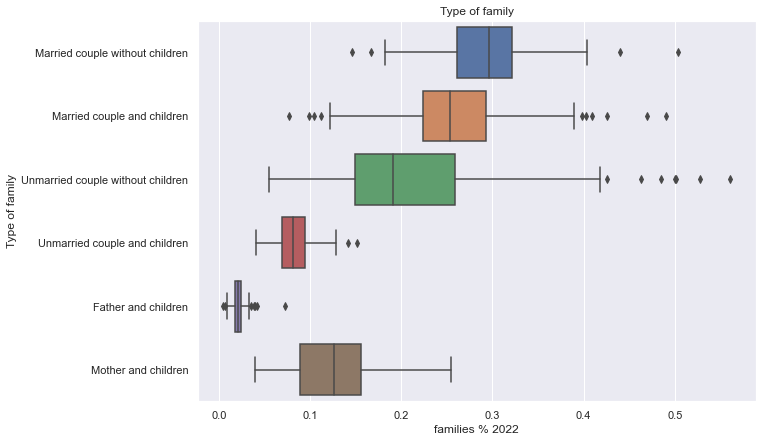

<Figure size 720x504 with 0 Axes>

In [22]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(data=type_of_family, x='families % 2022', y='Type of family')
plt.title('Type of family')
plt.show()
plt.clf()

## The population of Helsinki by gender, age and mother tongue

In [23]:
gender_age_mother_tongue = pd.read_csv('../data/Helsingin_vaesto_sukupuolen_ian_ja_aidinkielen_mukaan.csv', sep='\,', engine='python')
columns = gender_age_mother_tongue.columns
gender_age_mother_tongue = gender_age_mother_tongue.rename(columns={columns[0]:'Area',
                                                           columns[1]:'Mother tongue',
                                                           columns[2]:'Gender',
                                                           columns[3]:'Population',
                                                           columns[4]:'0 years old',
                                                           columns[5]:'1 years old',
                                                           columns[6]:'2 years old',
                                                           columns[7]:'3 years old',
                                                           columns[8]:'4 years old',
                                                           columns[9]:'5 years old',
                                                           columns[10]:'6 years old',
                                                           columns[11]:'7 years old',
                                                           columns[12]:'8 years old',
                                                           columns[13]:'9 years old',
                                                           columns[14]:'10 years old',
                                                           columns[15]:'11 years old',
                                                           columns[16]:'12 years old',
                                                           columns[17]:'13 years old',
                                                           columns[18]:'14 years old',
                                                           columns[19]:'15 years old',
                                                           columns[20]:'16 years old',
                                                           columns[21]:'17 years old',
                                                           columns[22]:'18 years old',
                                                           columns[23]:'19 years old',
                                                           columns[24]:'20-24 years old',
                                                           columns[25]:'25-29 years old',
                                                           columns[26]:'30-34 years old',
                                                           columns[27]:'35-39 years old',
                                                           columns[28]:'40-44 years old',
                                                           columns[29]:'45-49 years old',
                                                           columns[30]:'50-54 years old',
                                                           columns[31]:'55-59 years old',
                                                           columns[32]:'60-64 years old',
                                                           columns[33]:'65-69 years old',
                                                           columns[34]:'70-74 years old',
                                                           columns[35]:'75-79 years old',
                                                           columns[36]:'80-84 years old',
                                                           columns[37]:'85-89 years old',
                                                           columns[38]:'90-94 years old',
                                                           columns[39]:'over 95 years old',
                                                           })
columns = gender_age_mother_tongue.columns
gender_age_mother_tongue['Area'] = remove_quotes(gender_age_mother_tongue['Area'])
gender_age_mother_tongue['Mother tongue'] = remove_quotes(gender_age_mother_tongue['Mother tongue'])
gender_age_mother_tongue['Gender'] = remove_quotes(gender_age_mother_tongue['Gender'])
for col in columns[3:]:
    gender_age_mother_tongue[col] = remove_quotes(gender_age_mother_tongue[col])
    gender_age_mother_tongue[col] = change_to_numeric(gender_age_mother_tongue[col])
gender_age_mother_tongue.head()

,Area,Mother tongue,Gender,Population,0 years old,1 years old,2 years old,3 years old,4 years old,5 years old,...,50-54 years old,55-59 years old,60-64 years old,65-69 years old,70-74 years old,75-79 years old,80-84 years old,85-89 years old,90-94 years old,over 95 years old
0,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Molemmat sukupuolet,12984.0,110.0,85.0,96.0,91.0,87.0,96.0,...,825.0,847.0,681.0,659.0,714.0,677.0,362.0,147.0,74.0,22.0
1,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Miehet,6064.0,56.0,47.0,54.0,46.0,49.0,45.0,...,409.0,410.0,331.0,277.0,308.0,297.0,142.0,48.0,17.0,4.0
2,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Naiset,6920.0,54.0,38.0,42.0,45.0,38.0,51.0,...,416.0,437.0,350.0,382.0,406.0,380.0,220.0,99.0,57.0,18.0
3,091 101 Vironniemen peruspiiri,Ruotsi,Molemmat sukupuolet,1259.0,20.0,15.0,16.0,25.0,11.0,17.0,...,76.0,60.0,51.0,63.0,61.0,85.0,42.0,16.0,7.0,6.0
4,091 101 Vironniemen peruspiiri,Ruotsi,Miehet,627.0,11.0,9.0,7.0,11.0,4.0,8.0,...,38.0,33.0,26.0,22.0,32.0,43.0,23.0,7.0,2.0,3.0


In [24]:
gender_age_mother_tongue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               1128 non-null   object 
 1   Mother tongue      1128 non-null   object 
 2   Gender             1128 non-null   object 
 3   Population         984 non-null    float32
 4   0 years old        984 non-null    float32
 5   1 years old        984 non-null    float32
 6   2 years old        984 non-null    float32
 7   3 years old        984 non-null    float32
 8   4 years old        984 non-null    float32
 9   5 years old        984 non-null    float32
 10  6 years old        984 non-null    float32
 11  7 years old        984 non-null    float32
 12  8 years old        984 non-null    float32
 13  9 years old        984 non-null    float32
 14  10 years old       984 non-null    float32
 15  11 years old       984 non-null    float32
 16  12 years old       984 n

Select usable data and normalize it.

In [25]:
gender_mother_tongue = gender_age_mother_tongue[['Area','Mother tongue','Gender','Population']]

categorical_values = ['Area', 'Mother tongue', 'Gender']
for val in categorical_values:
    gender_mother_tongue[val] = gender_mother_tongue[val].astype('category')   

gender_mother_tongue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Area           1128 non-null   category
 1   Mother tongue  1128 non-null   category
 2   Gender         1128 non-null   category
 3   Population     984 non-null    float32 
dtypes: category(3), float32(1)
memory usage: 14.7 KB


<ipython-input-25-a1476cd90205>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_mother_tongue[val] = gender_mother_tongue[val].astype('category')


In [26]:
total_population = gender_mother_tongue[(gender_mother_tongue['Gender'] == 'Molemmat sukupuolet') & \
                                        (gender_mother_tongue['Mother tongue'] == 'Kaikki aidinkielet')]
total_population = total_population.rename(columns={'Population': 'total population'})
gender_mother_tongue = pd.merge(gender_mother_tongue, total_population, on=['Area', 'Mother tongue', 'Gender'], how='left')
gender_mother_tongue['total population'] = gender_mother_tongue['total population'].fillna(method='ffill')
gender_mother_tongue.head(10)

,Area,Mother tongue,Gender,Population,total population
0,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Molemmat sukupuolet,12984.0,12984.0
1,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Miehet,6064.0,12984.0
2,091 101 Vironniemen peruspiiri,Kaikki aidinkielet,Naiset,6920.0,12984.0
3,091 101 Vironniemen peruspiiri,Ruotsi,Molemmat sukupuolet,1259.0,12984.0
4,091 101 Vironniemen peruspiiri,Ruotsi,Miehet,627.0,12984.0
5,091 101 Vironniemen peruspiiri,Ruotsi,Naiset,632.0,12984.0
6,091 10 Kruununhaka,Kaikki aidinkielet,Molemmat sukupuolet,7222.0,7222.0
7,091 10 Kruununhaka,Kaikki aidinkielet,Miehet,3355.0,7222.0
8,091 10 Kruununhaka,Kaikki aidinkielet,Naiset,3867.0,7222.0
9,091 10 Kruununhaka,Ruotsi,Molemmat sukupuolet,753.0,7222.0


In [27]:
gender_mother_tongue['mother tongue % 2022'] = gender_mother_tongue['Population'] / gender_mother_tongue['total population']
gender_mother_tongue = gender_mother_tongue.drop(['Population', 'total population'], axis=1)
gender_mother_tongue = gender_mother_tongue.drop(gender_mother_tongue[gender_mother_tongue['Gender'] == \
                                                                      'Molemmat sukupuolet'].index)
gender_mother_tongue = gender_mother_tongue.drop(gender_mother_tongue[gender_mother_tongue['Mother tongue'] == \
                                                                      'Kaikki aidinkielet'].index)
gender_mother_tongue.loc[:,'Mother tongue'] = gender_mother_tongue['Mother tongue'].cat.remove_unused_categories()
gender_mother_tongue.loc[:,'Gender'] = gender_mother_tongue['Gender'].cat.remove_unused_categories()
gender_mother_tongue.head(10)

,Area,Mother tongue,Gender,mother tongue % 2022
4,091 101 Vironniemen peruspiiri,Ruotsi,Miehet,0.048290
5,091 101 Vironniemen peruspiiri,Ruotsi,Naiset,0.048675
10,091 10 Kruununhaka,Ruotsi,Miehet,0.051232
11,091 10 Kruununhaka,Ruotsi,Naiset,0.053032
16,091 20 Kluuvi,Ruotsi,Miehet,0.045045
17,091 20 Kluuvi,Ruotsi,Naiset,0.028529
22,091 80 Katajanokka,Ruotsi,Miehet,0.044545
23,091 80 Katajanokka,Ruotsi,Naiset,0.045133
28,091 102 Ullanlinnan peruspiiri,Ruotsi,Miehet,0.079880
29,091 102 Ullanlinnan peruspiiri,Ruotsi,Naiset,0.081891


Translate data.

In [28]:
gender_mother_tongue['Mother tongue'] = \
    gender_mother_tongue['Mother tongue'].apply(lambda x:
                                                str(x).replace('Ruotsi',
                                                               'Swedish'))
gender_mother_tongue['Gender'] = \
    gender_mother_tongue['Gender'].apply(lambda x:
                                         str(x).replace('Miehet',
                                                        'Men'))
gender_mother_tongue['Gender'] = \
    gender_mother_tongue['Gender'].apply(lambda x:
                                         str(x).replace('Naiset',
                                                        'Women'))

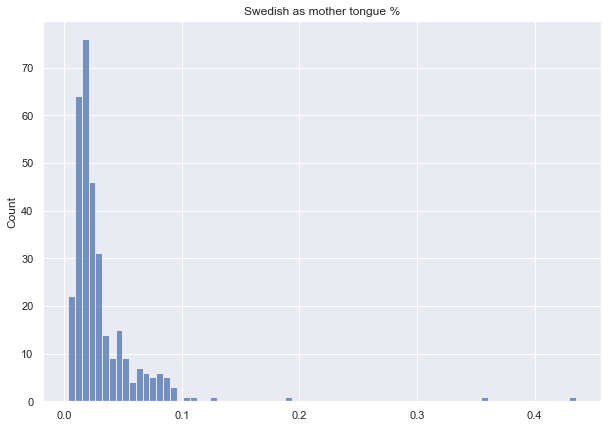

<Figure size 720x504 with 0 Axes>

In [29]:
sns.histplot(gender_mother_tongue, legend=False)
plt.title('Swedish as mother tongue %')
plt.show()
plt.clf()

### The population of Helsinki by main activity, gender and age

In [30]:
main_activity = pd.read_csv('../data/Helsingin_vaestö_paaasiallisen_toiminnan_sukupuolen_ja_ian_mukaan.csv', sep='\,', engine='python')
main_activity.replace(-1, np.NaN, inplace=True)
columns = main_activity.columns
main_activity = main_activity.rename(columns={columns[0]:'Area',
                                              columns[1]:'Main activity',
                                              columns[2]:'Gender',
                                              columns[3]:'Population 2021',
                                              columns[4]:'15-64 years old',
                                              columns[5]:'0-14 years old',
                                              columns[6]:'15-29 years old',
                                              columns[7]:'30-44 years old',
                                              columns[8]:'45-59 years old',
                                              columns[9]:'over 60 years old',
                                              })
columns = main_activity.columns
main_activity['Area'] = remove_quotes(main_activity['Area'])
main_activity['Main activity'] = remove_quotes(main_activity['Main activity'])
main_activity['Gender'] = remove_quotes(main_activity['Gender'])
for col in columns[3:]:
    main_activity[col] = remove_quotes(main_activity[col])
    main_activity[col] = change_to_numeric(main_activity[col])
main_activity = main_activity[['Area',
                               'Gender',
                               'Main activity',
                               'Population 2021',
                               '15-64 years old',
                               '0-14 years old',
                               '15-29 years old',
                               '30-44 years old',
                               '45-59 years old',
                               'over 60 years old']]
main_activity.head(12)

,Area,Gender,Main activity,Population 2021,15-64 years old,0-14 years old,15-29 years old,30-44 years old,45-59 years old,over 60 years old
0,091 101 Vironniemen peruspiiri,Yhteensa,Koko vaesto,12794.0,8670.0,1484.0,2574.0,2904.0,2503.0,3329.0
1,091 101 Vironniemen peruspiiri,Miehet,Koko vaesto,5992.0,4144.0,758.0,1148.0,1438.0,1204.0,1444.0
2,091 101 Vironniemen peruspiiri,Naiset,Koko vaesto,6802.0,4526.0,726.0,1426.0,1466.0,1299.0,1885.0
3,091 101 Vironniemen peruspiiri,Yhteensa,Tyovoima,7113.0,6977.0,0.0,1615.0,2567.0,2272.0,659.0
4,091 101 Vironniemen peruspiiri,Miehet,Tyovoima,3448.0,3387.0,0.0,710.0,1306.0,1102.0,330.0
5,091 101 Vironniemen peruspiiri,Naiset,Tyovoima,3665.0,3590.0,0.0,905.0,1261.0,1170.0,329.0
6,091 101 Vironniemen peruspiiri,Yhteensa,Tyolliset,6607.0,6471.0,0.0,1529.0,2389.0,2104.0,585.0
7,091 101 Vironniemen peruspiiri,Miehet,Tyolliset,3184.0,3123.0,0.0,656.0,1214.0,1021.0,293.0
8,091 101 Vironniemen peruspiiri,Naiset,Tyolliset,3423.0,3348.0,0.0,873.0,1175.0,1083.0,292.0
9,091 101 Vironniemen peruspiiri,Yhteensa,Tyottomat,506.0,506.0,0.0,86.0,178.0,168.0,74.0


In [31]:
main_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4512 non-null   object 
 1   Gender             4512 non-null   object 
 2   Main activity      4512 non-null   object 
 3   Population 2021    3782 non-null   float32
 4   15-64 years old    2695 non-null   float32
 5   0-14 years old     3911 non-null   float32
 6   15-29 years old    2825 non-null   float32
 7   30-44 years old    3336 non-null   float32
 8   45-59 years old    3180 non-null   float32
 9   over 60 years old  4512 non-null   float32
dtypes: float32(7), object(3)
memory usage: 229.2+ KB


Select usable data and normalize it.

In [32]:
main_activity = main_activity[['Area','Gender','Main activity','Population 2021']]

categorical_values = ['Area', 'Main activity', 'Gender']
for val in categorical_values:
    main_activity[val] = main_activity[val].astype('category')   

main_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             4512 non-null   category
 1   Gender           4512 non-null   category
 2   Main activity    4512 non-null   category
 3   Population 2021  3782 non-null   float32 
dtypes: category(3), float32(1)
memory usage: 41.4 KB


In [33]:
total_population = main_activity[(main_activity['Gender'] == 'Yhteensa') & \
                                 (main_activity['Main activity'] == 'Koko vaesto')]
total_population = total_population.rename(columns={'Population 2021': 'total population'})
main_activity = pd.merge(main_activity, total_population, on=['Area', 'Gender', 'Main activity'], how='left')
main_activity['total population'] = main_activity['total population'].fillna(method='ffill')
main_activity.head(10)

,Area,Gender,Main activity,Population 2021,total population
0,091 101 Vironniemen peruspiiri,Yhteensa,Koko vaesto,12794.0,12794.0
1,091 101 Vironniemen peruspiiri,Miehet,Koko vaesto,5992.0,12794.0
2,091 101 Vironniemen peruspiiri,Naiset,Koko vaesto,6802.0,12794.0
3,091 101 Vironniemen peruspiiri,Yhteensa,Tyovoima,7113.0,12794.0
4,091 101 Vironniemen peruspiiri,Miehet,Tyovoima,3448.0,12794.0
5,091 101 Vironniemen peruspiiri,Naiset,Tyovoima,3665.0,12794.0
6,091 101 Vironniemen peruspiiri,Yhteensa,Tyolliset,6607.0,12794.0
7,091 101 Vironniemen peruspiiri,Miehet,Tyolliset,3184.0,12794.0
8,091 101 Vironniemen peruspiiri,Naiset,Tyolliset,3423.0,12794.0
9,091 101 Vironniemen peruspiiri,Yhteensa,Tyottomat,506.0,12794.0


In [34]:
main_activity['main activity % 2021'] = main_activity['Population 2021'] / main_activity['total population']
main_activity = main_activity.drop(['Population 2021', 'total population'], axis=1)
main_activity = main_activity.drop(main_activity[main_activity['Gender'] == \
                                                 'Yhteensa'].index)
main_activity = main_activity.drop(main_activity[main_activity['Main activity'] == \
                                                 'Koko vaesto'].index)
main_activity.loc[:,'Main activity'] = main_activity['Main activity'].cat.remove_unused_categories()
main_activity.loc[:,'Gender'] = main_activity['Gender'].cat.remove_unused_categories()
main_activity.head(10)

,Area,Gender,Main activity,main activity % 2021
4,091 101 Vironniemen peruspiiri,Miehet,Tyovoima,0.269501
5,091 101 Vironniemen peruspiiri,Naiset,Tyovoima,0.286462
7,091 101 Vironniemen peruspiiri,Miehet,Tyolliset,0.248867
8,091 101 Vironniemen peruspiiri,Naiset,Tyolliset,0.267547
10,091 101 Vironniemen peruspiiri,Miehet,Tyottomat,0.020635
11,091 101 Vironniemen peruspiiri,Naiset,Tyottomat,0.018915
13,091 101 Vironniemen peruspiiri,Miehet,Tyovoiman ulkopuolella olevat,0.198843
14,091 101 Vironniemen peruspiiri,Naiset,Tyovoiman ulkopuolella olevat,0.245193
16,091 101 Vironniemen peruspiiri,Miehet,0-14-vuotiaat,0.059247
17,091 101 Vironniemen peruspiiri,Naiset,0-14-vuotiaat,0.056745


Translate the data.

In [35]:
main_activity['Gender'] = \
    main_activity['Gender'].apply(lambda x:
                                  str(x).replace('Miehet',
                                                 'Men'))
main_activity['Gender'] = \
    main_activity['Gender'].apply(lambda x:
                                  str(x).replace('Naiset',
                                                 'Women'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Tyovoiman ulkopuolella olevat',
                                                        'Outside the labor force'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Tyovoima',
                                                        'Labor force'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Tyolliset',
                                                        'Employed'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Tyottomat',
                                                        'Unemployed'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('0-14-vuotiaat',
                                                        '0-14 year olds'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Elakelaiset ja muut',
                                                        'Pensioners and others'))
main_activity['Main activity'] = \
    main_activity['Main activity'].apply(lambda x:
                                         str(x).replace('Opiskelijat ja koululaiset ja varus- ja siviilipalvelu',
                                                        'Students, school children, conscripts and civil service'))

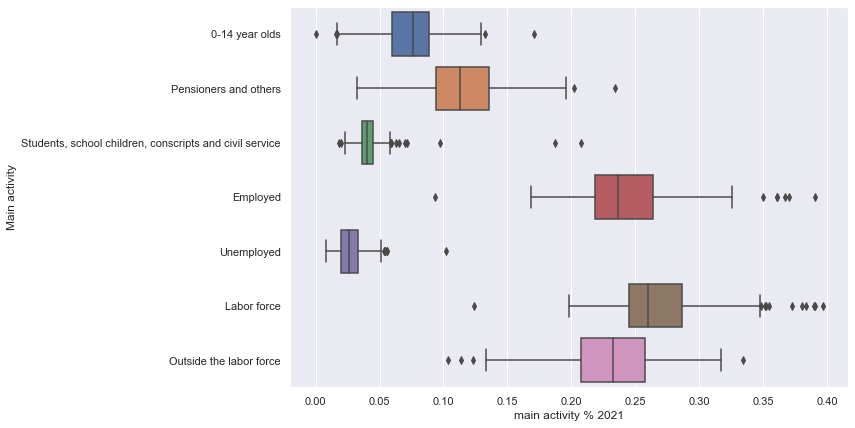

<Figure size 720x504 with 0 Axes>

In [36]:
sns.boxplot(data=main_activity, x='main activity % 2021', y='Main activity')
plt.show()
plt.clf()

## Create single dataframe

In [37]:
population_df = pd.merge(age_gender_education, main_activity, on=['Area','Gender'])
population_df = pd.merge(population_df, income_and_taxes, on=['Area'])
population_df = pd.merge(population_df, type_of_family, on=['Area'])
population_df = pd.merge(population_df, gender_mother_tongue, on=['Area','Gender'])
population_df.head(20)

,Area,Gender,Level of education,Education % 15-24 years,Education % 25-44 years,Education % 45-64 years,Education % 65 and over,Main activity,main activity % 2021,Type of income,2017,Type of family,families % 2022,Mother tongue,mother tongue % 2022
0,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Married couple without children,0.354232,Swedish,0.04829
1,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Unmarried couple without children,0.243374,Swedish,0.04829
2,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Married couple and children,0.227415,Swedish,0.04829
3,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Unmarried couple and children,0.058991,Swedish,0.04829
4,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Mother and children,0.094329,Swedish,0.04829
5,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / housing association,89459.0,Father and children,0.021659,Swedish,0.04829
6,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / person,47560.0,Married couple without children,0.354232,Swedish,0.04829
7,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / person,47560.0,Unmarried couple without children,0.243374,Swedish,0.04829
8,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / person,47560.0,Married couple and children,0.227415,Swedish,0.04829
9,091 101 Vironniemen peruspiiri,Men,Kaikki koulutusasteet,1.0,0.37906,0.297669,0.208254,Labor force,0.269501,State taxable income e / person,47560.0,Unmarried couple and children,0.058991,Swedish,0.04829


In [40]:
population_df['Area'] = population_df['Area'].astype('category') 
population_df['Gender'] = population_df['Gender'].astype('category') 

In [41]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185472 entries, 0 to 185471
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Area                     185472 non-null  category
 1   Gender                   185472 non-null  category
 2   Level of education       185472 non-null  category
 3   Education % 15-24 years  165312 non-null  float32 
 4   Education % 25-44 years  165312 non-null  float32 
 5   Education % 45-64 years  165312 non-null  float32 
 6   Education % 65 and over  165312 non-null  float32 
 7   Main activity            185472 non-null  category
 8   main activity % 2021     155232 non-null  float32 
 9   Type of income           185472 non-null  category
 10  2017                     159264 non-null  float32 
 11  Type of family           185472 non-null  category
 12  families % 2022          159264 non-null  float32 
 13  Mother tongue            185472 non-null  ca

## Data for housing

In [39]:
type_of_house = pd.read_csv('../data/Helsingin_asunnot_talotyypin_ja_valmistumisvuoden_mukaan.csv', sep='\,', engine='python')
type_of_house.head()

,"""Osa-alue","""""2022 Yhteensa Yhteensa""""","""""2022 Yhteensa Omakoti- ja paritalot""""","""""2022 Yhteensa Rivitalot""""","""""2022 Yhteensa Kerrostalot""""","""""2022 Yhteensa Muut rakennukset""""","""""2022 - 1920 Yhteensa""""","""""2022 - 1920 Omakoti- ja paritalot""""","""""2022 - 1920 Rivitalot""""","""""2022 - 1920 Kerrostalot""""",...,"""""2022 2020 Yhteensa""""","""""2022 2020 Omakoti- ja paritalot""""","""""2022 2020 Rivitalot""""","""""2022 2020 Kerrostalot""""","""""2022 2020 Muut rakennukset""""","""""2022 Tuntematon Yhteensa""""","""""2022 Tuntematon Omakoti- ja paritalot""""","""""2022 Tuntematon Rivitalot""""","""""2022 Tuntematon Kerrostalot""""","""""2022 Tuntematon Muut rakennukset"""""""
0,091 101 Vironniemen peruspiiri,8495,5,6,8087,397,3924,4,6,3712,...,110,0,0,110,0,0,0,0,0,0
1,091 10 Kruununhaka,4823,2,0,4569,252,2305,..,0,2177,...,45,0,0,45,0,0,0,0,0,0
2,091 20 Kluuvi,630,1,6,491,132,247,0,6,177,...,0,0,0,0,0,0,0,0,0,0
3,091 80 Katajanokka,3042,2,0,3027,13,1372,..,0,1358,...,65,0,0,65,0,0,0,0,0,0
4,091 102 Ullanlinnan peruspiiri,17085,62,30,16617,376,6439,36,23,6088,...,141,0,0,141,0,0,0,0,0,0
